In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#load the feature data
df = pd.read_csv('../data/feature_selected.csv')
x = df.drop('num', axis=1)
y = df['num']

In [3]:
#split data 
x_train ,x_test , y_train , y_test= train_test_split(x, y,test_size=0.2,random_state=42, stratify=y )


In [4]:
#intialize model
models={
    'Logistic Regression' : LogisticRegression(random_state=42), 
    'Decision Tree': DecisionTreeClassifier( random_state=42),
    'Ranom Forset': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


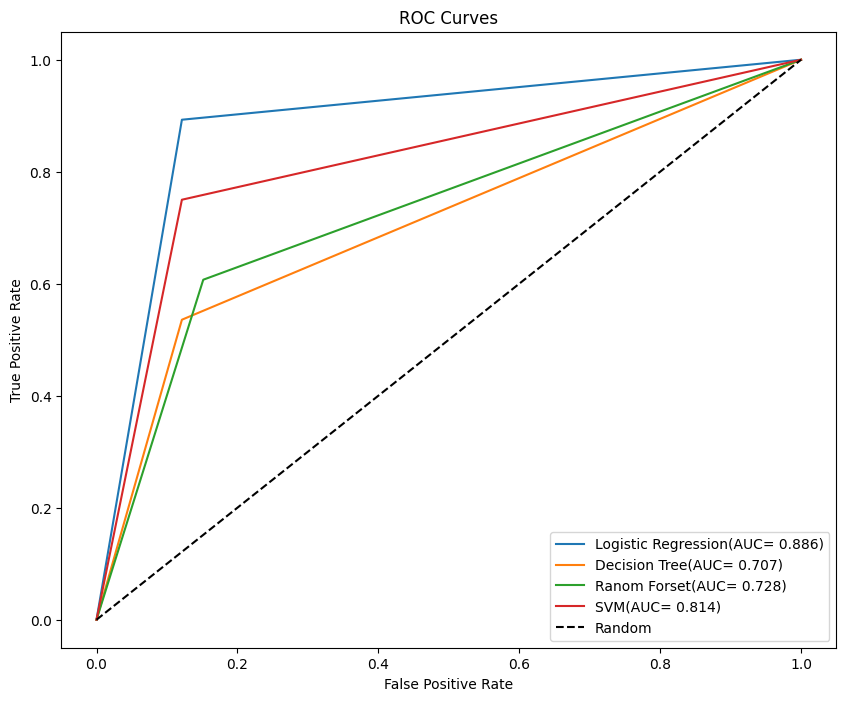

In [5]:
#train models and evalute 
results={}
plt.figure(figsize=(10, 8))
for name , model in models.items():
    #train model
    model.fit(x_train, y_train)
    #prediction
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # metrics
    results[name]={
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall':recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred)

    }
    #ROC curve
    fpr, tpr ,_ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name}(AUC= {results[name]['AUC']:.3f})')
    #plot ROC curves

plt.plot([0, 1], [0, 1],'k--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.savefig('../results/roc_curves.png')



In [6]:
# Save results
results_df = pd.DataFrame(results).T
results_df.to_csv('../results/model_performance.csv')
print(results_df)

# Save best model (highest F1-score)
best_model_name = results_df['F1-Score'].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, '../models/best_model.pkl')

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.885246   0.862069  0.892857  0.877193  0.885823
Decision Tree        0.721311   0.789474  0.535714  0.638298  0.707251
Ranom Forset         0.737705   0.772727  0.607143  0.680000  0.727814
SVM                  0.819672   0.840000  0.750000  0.792453  0.814394


['../models/best_model.pkl']